In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import numpy as np


In [4]:
tickers = {"AAPL": "STOCKS","NVDA":"STOCKS", "XAR":"ETF"}
periods = {"ytd", "1y", "2y", "5y", "max"}

for ticker in tickers.keys():
    for period in periods:
        output = f"{tickers[ticker]}/{ticker}/{ticker}_{period}_ti.csv"
        command = f"indicators {ticker} -p {period} -o {output}"
        result = subprocess.run(command, shell=True,text=True)

Indicators saved to STOCKS/AAPL/AAPL_ytd_ti.csv for AAPL over ytd
Indicators saved to STOCKS/AAPL/AAPL_2y_ti.csv for AAPL over 2y
Indicators saved to STOCKS/AAPL/AAPL_1y_ti.csv for AAPL over 1y
Indicators saved to STOCKS/AAPL/AAPL_5y_ti.csv for AAPL over 5y
Indicators saved to STOCKS/AAPL/AAPL_max_ti.csv for AAPL over max
Indicators saved to STOCKS/NVDA/NVDA_ytd_ti.csv for NVDA over ytd
Indicators saved to STOCKS/NVDA/NVDA_2y_ti.csv for NVDA over 2y
Indicators saved to STOCKS/NVDA/NVDA_1y_ti.csv for NVDA over 1y
Indicators saved to STOCKS/NVDA/NVDA_5y_ti.csv for NVDA over 5y
Indicators saved to STOCKS/NVDA/NVDA_max_ti.csv for NVDA over max
Indicators saved to ETF/XAR/XAR_ytd_ti.csv for XAR over ytd
Indicators saved to ETF/XAR/XAR_2y_ti.csv for XAR over 2y
Indicators saved to ETF/XAR/XAR_1y_ti.csv for XAR over 1y
Indicators saved to ETF/XAR/XAR_5y_ti.csv for XAR over 5y
Indicators saved to ETF/XAR/XAR_max_ti.csv for XAR over max


In [3]:
df = pd.read_csv("ETF/XAR/XAR_5y_ti.csv")
df.columns = df.columns.str.lower()
df.head()

,date,open,high,low,close,volume,dividends,stock splits,capital gains,sma_50,...,bb_upper,bb_lower,hi_lo,hi_close,lo_close,true_range,atr,obv,%k,%d
0,2019-11-06 00:00:00-05:00,103.965006,104.206785,103.703888,104.081062,88200,0.0,0.0,0.0,NaN,...,NaN,NaN,0.502897,NaN,NaN,0.502897,NaN,NaN,NaN,NaN
1,2019-11-07 00:00:00-05:00,104.825742,105.802531,104.709685,104.980484,207300,0.0,0.0,0.0,NaN,...,NaN,NaN,1.092846,1.721469,0.628623,1.721469,NaN,0.008642,NaN,NaN
2,2019-11-08 00:00:00-05:00,105.377007,106.653601,105.377007,106.344124,82000,0.0,0.0,0.0,NaN,...,NaN,NaN,1.276593,1.673117,0.396523,1.673117,NaN,0.021631,NaN,NaN
3,2019-11-11 00:00:00-05:00,105.821867,106.798657,105.512391,106.566551,92300,0.0,0.0,0.0,NaN,...,NaN,NaN,1.286266,0.454533,0.831733,1.286266,NaN,0.023723,NaN,NaN
4,2019-11-12 00:00:00-05:00,106.527898,107.204877,106.363490,106.972771,53100,0.0,0.0,0.0,NaN,...,NaN,NaN,0.841387,0.638325,0.203061,0.841387,NaN,0.027534,NaN,NaN


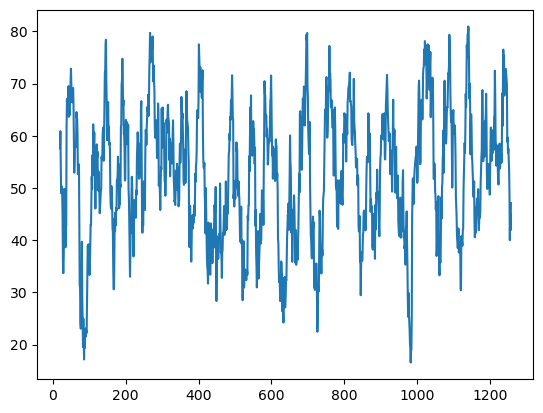

In [19]:
plt.plot(df["rsi"])

In [20]:
df[df["rsi"]<30].index

Index([ 76,  77,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94, 449, 521, 624, 626, 630, 631, 632, 633, 634, 635, 637, 638,
       639, 725, 726, 727, 845, 974, 975, 976, 977, 978, 979, 980, 981, 982,
       983, 984, 985],
      dtype='int64')

<Axes: >

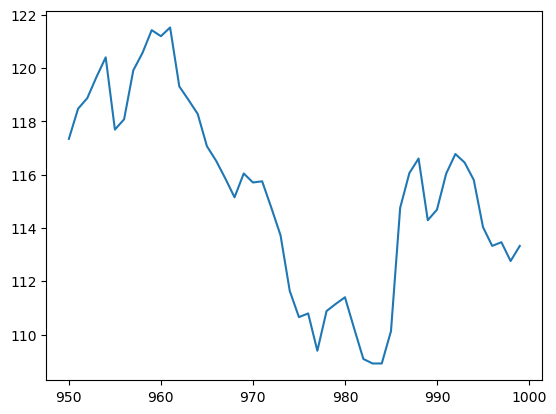

In [29]:
df.iloc[950:1000]["close"].plot()

In [30]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'stock splits', 'capital gains', 'sma_50', 'ema_50', 'macd',
       'signal_line', 'macd_hist', 'rsi', 'bb_upper', 'bb_lower', 'hi_lo',
       'hi_close', 'lo_close', 'true_range', 'atr', 'obv', '%k', '%d'],
      dtype='object')

/tmp/ipykernel_14801/1275215160.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


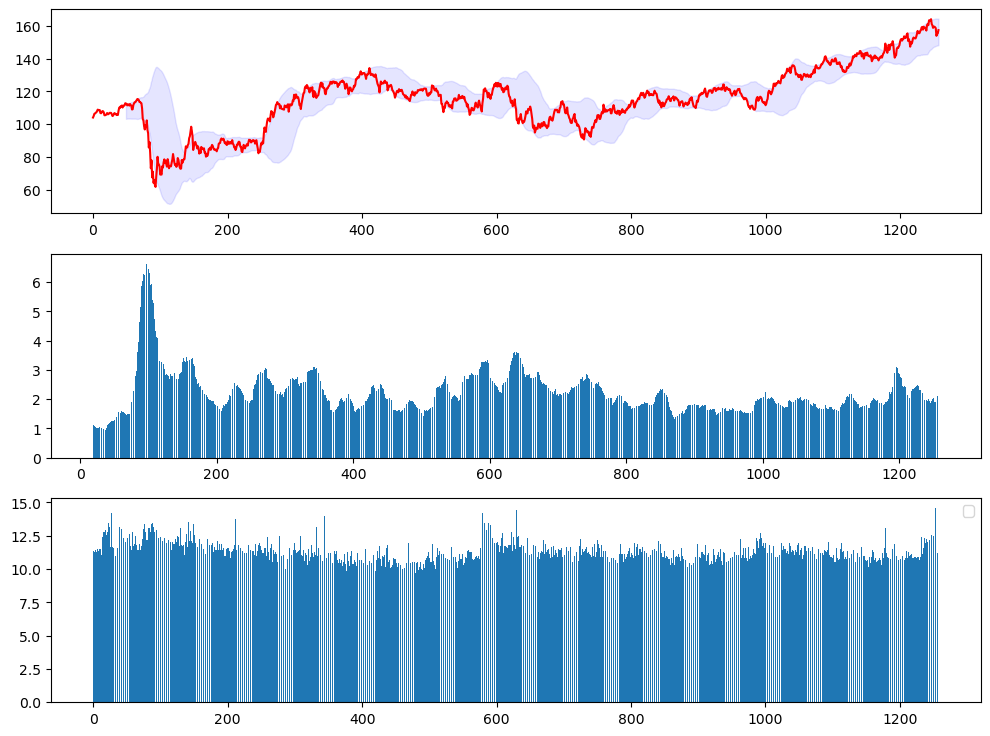

In [44]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)

fig.set_size_inches(12,9)

ax1.fill_between(x=range(0,len(df["close"])), y1=df["bb_lower"], y2=df["bb_upper"], color="blue",alpha=0.1, label="BBands")
ax1.plot(df["close"], label = "close", color="red")

ax2.bar(range(0,len(df["atr"])),df["atr"])
ax3.bar(range(0,len(df["volume"])), np.log(df["volume"]))

plt.legend()
plt.show()

In [6]:
df.tail()

,date,open,high,low,close,volume,dividends,stock splits,capital gains,sma_50,...,bb_upper,bb_lower,hi_lo,hi_close,lo_close,true_range,atr,obv,%k,%d
1253,2024-10-30 00:00:00-04:00,158.690002,160.059998,158.330002,158.449997,2132700,0.0,0.0,0.0,156.006008,...,164.323234,147.688783,1.729996,1.020004,0.709991,1.729996,1.908501,15.171462,27.508451,34.247398
1254,2024-10-31 00:00:00-04:00,157.529999,157.529999,153.720001,153.800003,595600,0.0,0.0,0.0,156.045467,...,164.300257,147.790676,3.809998,0.919998,4.729996,4.729996,2.053501,15.200808,0.716862,21.255335
1255,2024-11-01 00:00:00-04:00,155.100006,156.520004,154.830002,154.979996,157700,0.0,0.0,0.0,156.105928,...,164.282402,147.929455,1.690002,2.720001,1.029999,2.720001,2.097501,15.208481,11.290270,13.171861
1256,2024-11-04 00:00:00-05:00,154.979996,156.149994,154.770004,155.279999,75300,0.0,0.0,0.0,156.141032,...,164.287291,147.994774,1.379990,1.169998,0.209991,1.379990,2.091000,15.210416,13.978468,8.661867
1257,2024-11-05 00:00:00-05:00,156.080002,157.309998,155.970001,157.289993,69800,0.0,0.0,0.0,156.234711,...,164.322565,148.146858,1.339996,2.029999,0.690002,2.029999,2.136501,15.223361,31.989166,19.085968


<BarContainer object of 1258 artists>

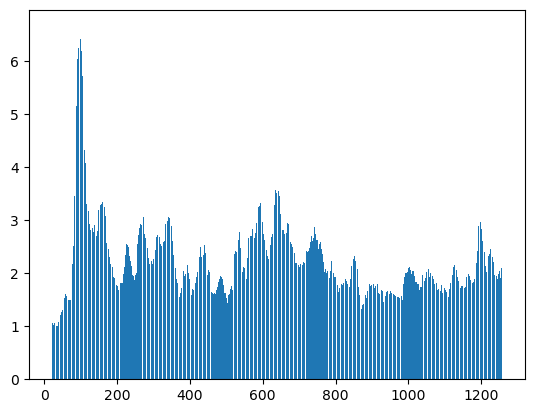

In [40]:
plt.bar(range(0,len(df["atr"])),df["atr"])

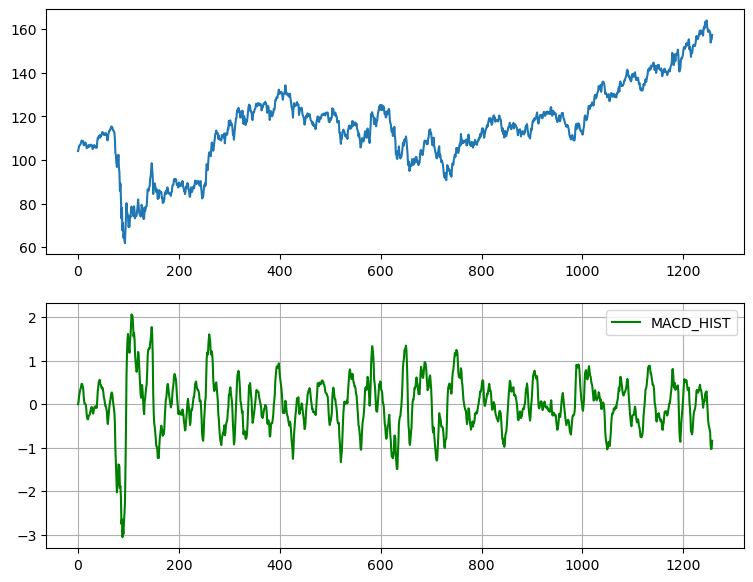

In [5]:
fig, (ax,axx) = plt.subplots(2,1)
fig.set_size_inches(9,7)

ax.plot(df["close"])

# axx.plot(range(0,len(df["macd"])), df["macd"].to_numpy(), label="MACD")
# axx.plot(range(0,len(df["signal_line"])), df["signal_line"].to_numpy(), label="signal_line")
axx.plot(df["macd_hist"], label="MACD_HIST", color="green")

plt.grid(True)

plt.legend()
plt.show()

In [53]:
df[df["macd"]>df["signal_line"]].index[:20]

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 38, 39, 40, 41, 42, 43], dtype='int64')